In [2]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

In [3]:
netflix_df = pd.read_csv("../Netflix_dataset/titles.csv")
netflix_df

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts300399,Five Came Back: The Reference Films,SHOW,This collection includes 12 World War II-era p...,1945,TV-MA,51,['documentation'],['US'],1.0,NaN,NaN,NaN,0.601,NaN
1,tm82169,Rocky,MOVIE,"When world heavyweight boxing champion, Apollo...",1976,PG,119,"['drama', 'sport']",['US'],NaN,tt0075148,8.1,588100.0,106.361,7.782
2,tm17823,Grease,MOVIE,Australian good girl Sandy and greaser Danny f...,1978,PG,110,"['romance', 'comedy']",['US'],NaN,tt0077631,7.2,283316.0,33.160,7.406
3,tm191099,The Sting,MOVIE,A novice con man teams up with an acknowledged...,1973,PG,129,"['crime', 'drama', 'comedy', 'music']",['US'],NaN,tt0070735,8.3,266738.0,24.616,8.020
4,tm69975,Rocky II,MOVIE,After Rocky goes the distance with champ Apoll...,1979,PG,119,"['drama', 'sport']",['US'],NaN,tt0079817,7.3,216307.0,75.699,7.246
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6132,tm1303784,عبود في البيت,MOVIE,Two young boys must work together to stop robb...,2023,NaN,81,"['family', 'comedy']",['KW'],NaN,NaN,NaN,NaN,3.351,2.000
6133,tm1260999,Sweetie,MOVIE,"‘Theatre is my life,’ Yıldız Kenter admits in ...",2023,NaN,120,['documentation'],['TR'],NaN,tt26349328,7.9,209.0,2.450,7.200
6134,tm1310286,Sommore: Queen Chandelier,MOVIE,This Queen of Comedy shines as she takes the s...,2023,NaN,69,['comedy'],['US'],NaN,tt21033382,6.1,91.0,1.960,NaN
6135,tm1072700,All Na Vibes,MOVIE,The lives of three teenagers and a hit-man int...,2023,NaN,80,['drama'],['NG'],NaN,tt14922926,5.2,18.0,1.357,4.000


In [29]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# 넷플릭스 데이터셋을 읽어옵니다.
netflix_data = pd.read_csv("../Netflix_dataset/titles.csv")

# 군집화에 사용할 특성을 선택합니다.
selected_features = ['type', 'age_certification', 'genres', 'runtime']

# 선택한 특성을 추출합니다.
features = netflix_data[selected_features]

# 범주형 변수인 'rating'과 'type'을 원-핫 인코딩합니다.
features_encoded = pd.get_dummies(features)

# 특성을 표준화합니다.
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features_encoded)

# K-means 군집화 모델을 생성하고 학습합니다.
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(scaled_features)

# 군집화 결과를 확인합니다.
cluster_labels = kmeans.labels_

# 결과를 원래 데이터프레임에 추가합니다.
netflix_data['cluster'] = cluster_labels

# 결과 확인
print(netflix_data[['title', 'cluster']])


/Users/kangseungmin/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


                                    title  cluster
0     Five Came Back: The Reference Films        1
1                                   Rocky        1
2                                  Grease        1
3                               The Sting        1
4                                Rocky II        1
...                                   ...      ...
6132                        عبود في البيت        1
6133                              Sweetie        1
6134            Sommore: Queen Chandelier        1
6135                         All Na Vibes        1
6136                      Going to Heaven        1

[6137 rows x 2 columns]


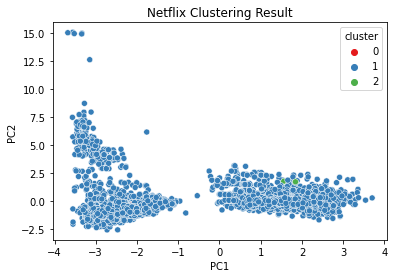

In [30]:
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt

# PCA를 사용하여 특성을 2차원으로 축소합니다.
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(scaled_features)

# 군집화 결과를 추가한 데이터프레임을 생성합니다.
clustered_data = pd.DataFrame(data=reduced_features, columns=['PC1', 'PC2'])
clustered_data['cluster'] = netflix_data['cluster']

# 시각화를 위해 seaborn을 사용합니다.
sns.scatterplot(data=clustered_data, x='PC1', y='PC2', hue='cluster', palette='Set1')
plt.title('Netflix Clustering Result')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

In [21]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# 넷플릭스 데이터셋을 읽어옵니다.
netflix_data = pd.read_csv("../Netflix_dataset/titles.csv")

# 군집화에 사용할 특성을 선택합니다.
selected_features = ['age_certification', 'genres']

# 선택한 특성을 추출합니다.
features = netflix_data[selected_features]

# 범주형 변수인 'rating'과 'type'을 원-핫 인코딩합니다.
features_encoded = pd.get_dummies(features)

# 특성을 표준화합니다.
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features_encoded)

# K-means 군집화 모델을 생성하고 학습합니다.
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(scaled_features)

# 군집화 결과를 확인합니다.
cluster_labels = kmeans.labels_

# 결과를 원래 데이터프레임에 추가합니다.
netflix_data['cluster'] = cluster_labels

# 결과 확인
print(netflix_data[['title', 'cluster']])


/Users/kangseungmin/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


                                    title  cluster
0     Five Came Back: The Reference Films        2
1                                   Rocky        2
2                                  Grease        2
3                               The Sting        2
4                                Rocky II        2
...                                   ...      ...
6132                        عبود في البيت        2
6133                              Sweetie        2
6134            Sommore: Queen Chandelier        2
6135                         All Na Vibes        2
6136                      Going to Heaven        2

[6137 rows x 2 columns]


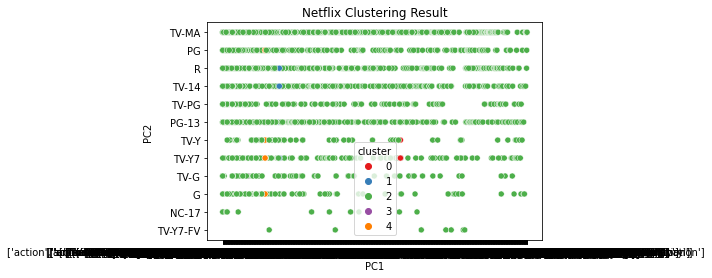

In [22]:
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt

# # PCA를 사용하여 특성을 2차원으로 축소합니다.
# pca = PCA(n_components=2)
# reduced_features = pca.fit_transform(scaled_features)

# # 군집화 결과를 추가한 데이터프레임을 생성합니다.
# clustered_data = pd.DataFrame(data=reduced_features, columns=['PC1', 'PC2'])
# clustered_data['cluster'] = netflix_data['cluster']

# 시각화를 위해 seaborn을 사용합니다.
sns.scatterplot(data=netflix_data, x='genres', y='age_certification', hue='cluster', palette='Set1')
plt.title('Netflix Clustering Result')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

In [16]:
netflix_data

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,cluster
0,ts300399,Five Came Back: The Reference Films,SHOW,This collection includes 12 World War II-era p...,1945,TV-MA,51,['documentation'],['US'],1.0,NaN,NaN,NaN,0.601,NaN,1
1,tm82169,Rocky,MOVIE,"When world heavyweight boxing champion, Apollo...",1976,PG,119,"['drama', 'sport']",['US'],NaN,tt0075148,8.1,588100.0,106.361,7.782,0
2,tm17823,Grease,MOVIE,Australian good girl Sandy and greaser Danny f...,1978,PG,110,"['romance', 'comedy']",['US'],NaN,tt0077631,7.2,283316.0,33.160,7.406,0
3,tm191099,The Sting,MOVIE,A novice con man teams up with an acknowledged...,1973,PG,129,"['crime', 'drama', 'comedy', 'music']",['US'],NaN,tt0070735,8.3,266738.0,24.616,8.020,0
4,tm69975,Rocky II,MOVIE,After Rocky goes the distance with champ Apoll...,1979,PG,119,"['drama', 'sport']",['US'],NaN,tt0079817,7.3,216307.0,75.699,7.246,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6132,tm1303784,عبود في البيت,MOVIE,Two young boys must work together to stop robb...,2023,NaN,81,"['family', 'comedy']",['KW'],NaN,NaN,NaN,NaN,3.351,2.000,1
6133,tm1260999,Sweetie,MOVIE,"‘Theatre is my life,’ Yıldız Kenter admits in ...",2023,NaN,120,['documentation'],['TR'],NaN,tt26349328,7.9,209.0,2.450,7.200,1
6134,tm1310286,Sommore: Queen Chandelier,MOVIE,This Queen of Comedy shines as she takes the s...,2023,NaN,69,['comedy'],['US'],NaN,tt21033382,6.1,91.0,1.960,NaN,1
6135,tm1072700,All Na Vibes,MOVIE,The lives of three teenagers and a hit-man int...,2023,NaN,80,['drama'],['NG'],NaN,tt14922926,5.2,18.0,1.357,4.000,1
